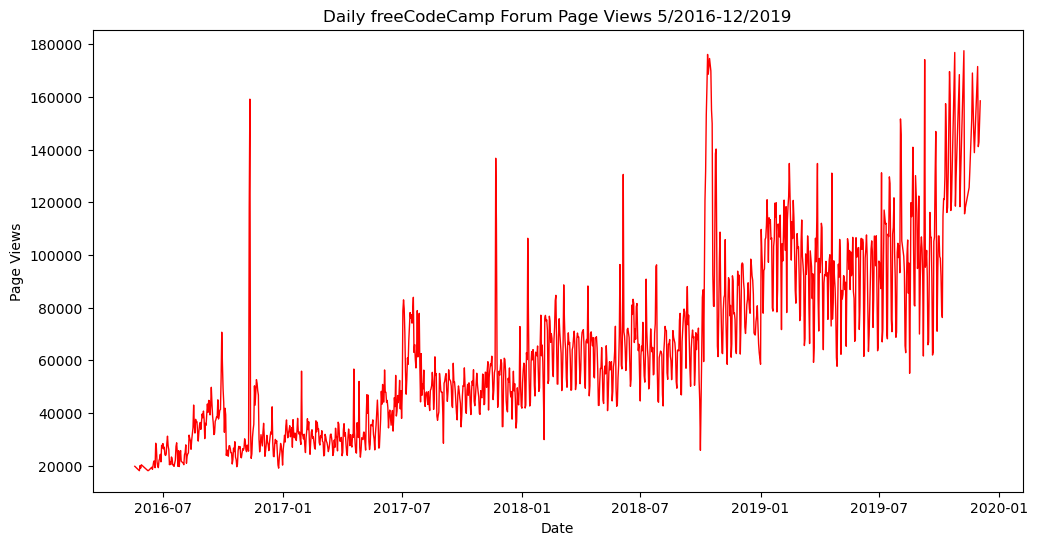

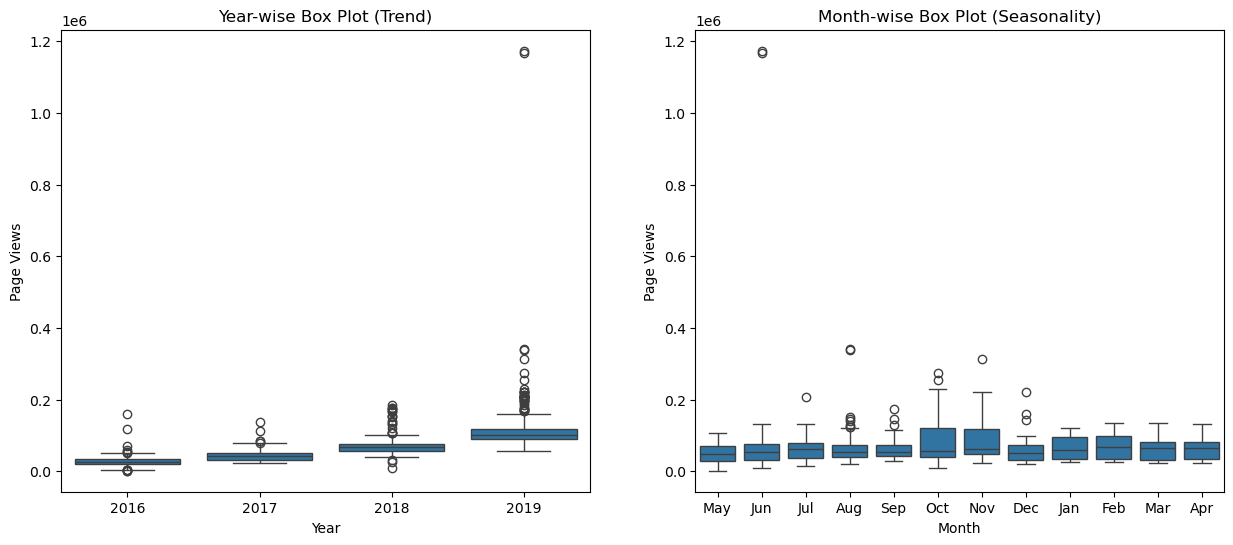

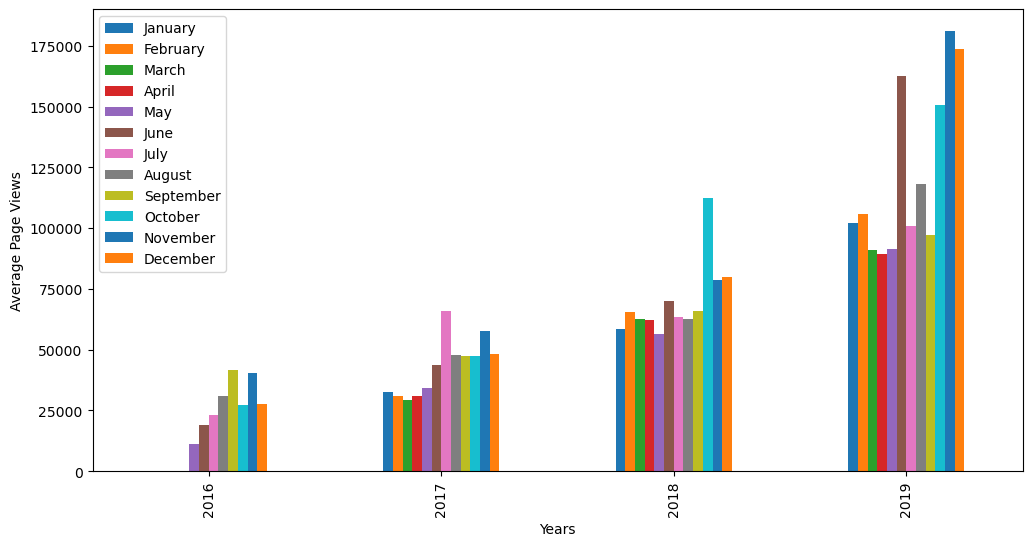

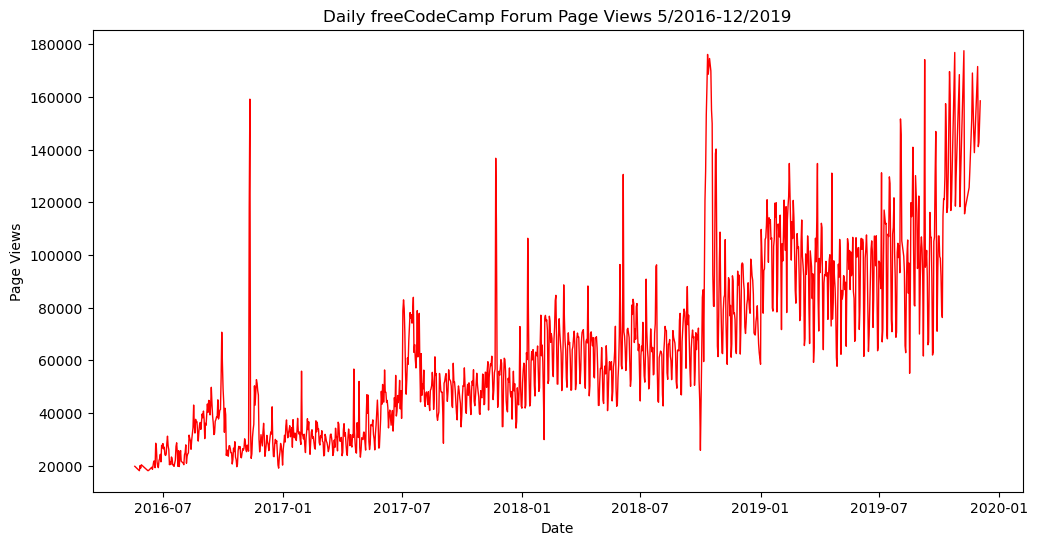

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=["date"], index_col="date")

# Clean data by removing top and bottom 2.5% of page views
lower = df["value"].quantile(0.025)
upper = df["value"].quantile(0.975)
df_clean = df[(df["value"] >= lower) & (df["value"] <= upper)]

# Line plot
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df_clean.index, df_clean["value"], color="red", linewidth=1)
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    fig.savefig("line_plot.png")
    return fig

# Bar plot
def draw_bar_plot():
    df_bar = df.copy()
    df_bar["year"] = df_bar.index.year
    df_bar["month"] = df_bar.index.month
    df_grouped = df_bar.groupby(["year", "month"])["value"].mean().unstack()

    fig = df_grouped.plot(
        kind="bar", 
        figsize=(12, 6),
        ylabel="Average Page Views",
        xlabel="Years"
    ).figure

    plt.legend([
        "January", "February", "March", "April", "May", "June",
        "July", "August", "September", "October", "November", "December"
    ])
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig.savefig("bar_plot.png")
    return fig

# Box plot
def draw_box_plot():
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')
    df_box['month_num'] = df_box['date'].dt.month
    df_box = df_box.sort_values('month_num') # if we will not do this then our months will be randomply arranged

   
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    sns.boxplot(x="year", y="value", data=df_box, ax=axes[0])
    axes[0].set_title("Year-wise Box Plot (Trend)")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Page Views")

    sns.boxplot(x="month", y="value", data=df_box, ax=axes[1])
    axes[1].set_title("Month-wise Box Plot (Seasonality)")
    axes[1].set_xlabel("Month")
    axes[1].set_ylabel("Page Views")

    fig.savefig("box_plot.png")
    return fig
draw_box_plot()
draw_bar_plot()
draw_line_plot()
